# Logistic regression – introduction and advantages

Logistic regression applies maximum likelihood estimation after transforming the
dependent variable into a logit variable (natural log of the odds of the dependent variable
occurring or not) with respect to independent variables. In this way, logistic regression
estimates the probability of a certain event occurring.

 - Maximum likelihood estimation is a method of estimating the parameters of a model given observations, by finding the parameter values that maximize the likelihood of making the observations, this means finding parameters that maximize the probability p of event 1 and (1-p) of non-event 0.
 - By converting probability to log(odds), we have expanded the range from [0, 1] to [- ∞, +∞ ].
 
## One more question one ask is what will happen if someone fit the linear regression on a 0-1 problem rather than on logistic regression?

- Error terms will tend to be large at the middle values of X (independent variable) and small at the extreme values, which is the violation of linear regression assumptions that errors should have zero mean and should be normally distributed
- Generates nonsensical predictions of greater than 1 and less than 0 at end values of X
- The ordinary least squares (OLS) estimates are inefficient and standard errors are biased
- High error variance in the middle values of X and low variance at ends

# Terminology involved in logistic regression

- Information value (IV): This is very useful in the preliminary filtering of variables prior to including them in the model. IV is mainly used by industry for eliminating major variables in the first step prior to fitting the model, as the number of variables present in the final model would be about 10. Hence, initial processing is needed to reduce variables from 400+ in number or so.
- Akaike information criteria (AIC): This measures the relative quality of a statistical model for a given set of data. It is a trade-off between bias versus variance. During a comparison between two models, the model with less AIC is preferred over higher value.
- Receiver operating characteristic (ROC) curve: This is a graphical plot that illustrates the performance of a binary classifier as its discriminant threshold is varied. The curve is created by plotting true positive rate (TPR) against false positive rate (FPR) at various threshold values.
- Rank ordering: After sorting observations in descending order by predicted probabilities, deciles are created (10 equal bins with 10 percent of total observations in each bin). By adding up the number of events in each decile, we will get aggregated events for each decile and this number should be in decreasing order, else it will be in serious violation of logistic regression methodology.
- Concordance/c-statistic: This is a measure of quality of fit for a binary outcome in a logistic regression model. It is a proportion of pairs in which the predicted event probability is higher for the actual event than non-event.
- K-S statistic: This is the maximum distance between two population distributions. It helps with discriminating default accounts from non-default accounts.
- Population stability index (PSI): This is the metric used to check that drift in the current population on which the credit scoring model will be used is the same as the population with respective to development time:
    - PSI <= 0.1: This states no change in characteristics of the current population with respect to the development population
    - 0.1 < PSI <= 0.25: This signifies some change has taken place and warns for attention, but can still be used
    - PSI >0.25: This indicates a large shift in the score distribution of the current population compared with development time

# Example of logistic regression using German credit data

In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [3]:
credit_data = pd.read_csv(r"C:\Users\Admin\Downloads\german_credit_data.csv")

In [4]:
credit_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
df=credit_data.copy()

In [6]:
df=df.drop('Unnamed: 0',axis=1)

In [7]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [9]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [10]:
from scipy import stats

In [11]:
dt_mode = stats.mode(df['Checking account'])
print ("Mode :",dt_mode[0][0])

Mode : little


In [12]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [13]:
df['Checking account'] =df['Checking account'].map({"little":0,"moderate":1,"rich":2 });
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].dropna().median())

In [14]:
df['Checking account'].value_counts()

1.0    663
0.0    274
2.0     63
Name: Checking account, dtype: int64

In [15]:
df['Saving accounts']=df['Saving accounts'].map({"little":0,"moderate":1,"rich":2 ,"quite rich":3});
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].dropna().median())

In [16]:
df['Saving accounts'].value_counts()

0.0    786
1.0    103
3.0     63
2.0     48
Name: Saving accounts, dtype: int64

In [17]:
credit_data_1=df.copy()

In [18]:
credit_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     1000 non-null float64
Checking account    1000 non-null float64
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [19]:
credit_data_1.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [20]:
discrete_columns = ['Sex','Housing','Purpose']
continuous_columns = ['Age','Job','Saving accounts', 'Checking account','Credit amount', 'Duration']

In [21]:
total_columns = discrete_columns + continuous_columns

In [22]:
credit_data_1['Risk'].unique()

array(['good', 'bad'], dtype=object)

In [23]:
credit_data_1['Risk']=credit_data_1['Risk'].map({"bad":1,"good":2});

In [24]:
credit_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     1000 non-null float64
Checking account    1000 non-null float64
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 78.2+ KB


In [25]:
# Note : TARGET VARIABLE SHOULD BE CONVERETED IN 1 & @ Respect. for following code to run (IN this case 'Risk')

In [26]:
def IV_calc(data,var): 
    if data[var].dtypes == "object": 
        dataf = data.groupby([var])['Risk'].agg(['count','sum']) 
        dataf.columns = ["Total","bad"] 
        dataf["good"] = dataf["Total"] - dataf["bad"] 
        dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum()
        dataf["good_per"] = dataf["good"]/dataf["good"].sum() 
        dataf["I_V"] = (dataf["good_per"] - dataf["bad_per"]) * np.log(dataf["good_per"]/dataf["bad_per"]) 
        return dataf 
    else: 
        data['bin_var'] = pd.qcut(data[var].rank(method='first'),10)
        dataf = data.groupby(['bin_var'])['Risk'].agg(['count','sum']) 
        dataf.columns = ["Total","bad"] 
        dataf["good"] = dataf["Total"] - dataf["bad"] 
        dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum() 
        dataf["good_per"] = dataf["good"]/dataf["good"].sum() 
        dataf["I_V"] = (dataf["good_per"] - dataf["bad_per"]) * np.log(dataf["good_per"]/dataf["bad_per"]) 
        return dataf 

In [27]:
Iv_list = [] 
for col in total_columns: 
    assigned_data = IV_calc(data = credit_data_1,var = col)
    iv_val = round(assigned_data["I_V"].sum(),3) 
    dt_type = credit_data_1[col].dtypes
    Iv_list.append((iv_val,col,dt_type))
Iv_list = sorted(Iv_list,reverse = True)
for i in range(len(Iv_list)): 
        print (Iv_list[i][0],",",Iv_list[i][1],",type =",Iv_list[i][2])

0.011 , Checking account ,type = float64
0.008 , Duration ,type = int64
0.004 , Credit amount ,type = int64
0.003 , Housing ,type = object
0.003 , Age ,type = int64
0.002 , Saving accounts ,type = float64
0.002 , Purpose ,type = object
0.002 , Job ,type = int64
0.001 , Sex ,type = object


In the following output, all the variables with an information value are shown in descending order. After the information value, variable name, and the type of the variable have also been shown. If the type is object, this means that it is a categorical variable; similarly, if type is float64 this means it is a 64-bit float value. We will be considering the top XX variables for the next stage of analysis.

In [28]:
df_1=credit_data_1.copy()

In [56]:
df_2=credit_data_1.copy()

In [59]:
#df_2=df_2.drop('bin_var',axis=1)
#df_2['Risk']=df_2['Risk'].map({2:1,1:0})

In [60]:
df_2.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,0.0,0.0,1169,6,radio/TV,1
1,22,female,2,own,0.0,1.0,5951,48,radio/TV,0
2,49,male,1,own,0.0,1.0,2096,12,education,1
3,45,male,2,free,0.0,0.0,7882,42,furniture/equipment,1
4,53,male,2,free,0.0,0.0,4870,24,car,0


In [32]:
dummy_sex = pd.get_dummies(df_2['Sex'],prefix='sex',drop_first=True)
dummy_house = pd.get_dummies(df_2['Housing'],prefix='house',drop_first=True)
dummy_purpose = pd.get_dummies(df_2['Purpose'],prefix='purpose',drop_first=True)

In [33]:
discrete_columns = ['Sex','Housing','Purpose']
continuous_columns = ['Age','Saving accounts', 'Checking account', 'Duration']
#'Credit amount' ---- remmoved -- Log-Likelihood decreased to -377

In [34]:
credit_continuous = df_2[continuous_columns]

In [35]:
credit_data_new = pd.concat([dummy_sex,dummy_house,dummy_purpose,credit_continuous,df_2['Risk']],axis=1)
#dummy_purpose --- is removed --- also increased the model accuracy
credit_data_new=credit_data_new.drop('purpose_domestic appliances',axis=1)
credit_data_new=credit_data_new.drop('purpose_vacation/others',axis=1)
credit_data_new=credit_data_new.drop('purpose_repairs',axis=1)
credit_data_new=credit_data_new.drop('purpose_education',axis=1)
credit_data_new=credit_data_new.drop('purpose_car',axis=1)
credit_data_new=credit_data_new.drop('purpose_furniture/equipment',axis=1)
credit_data_new=credit_data_new.drop('house_rent',axis=1)
credit_data_new.head()

,sex_male,house_own,purpose_radio/TV,Age,Saving accounts,Checking account,Duration,Risk
0,1,1,1,67,0.0,0.0,6,1
1,0,1,1,22,0.0,1.0,48,0
2,1,1,0,49,0.0,1.0,12,1
3,1,0,0,45,0.0,0.0,42,1
4,1,0,0,53,0.0,0.0,24,0


In [36]:
x_train,x_test,y_train,y_test = train_test_split( credit_data_new.drop(['Risk'] ,axis=1),
                                                 credit_data_new['Risk'],train_size = 0.7,
                                                 random_state=42)

In [37]:
x_test[:2]

,sex_male,house_own,purpose_radio/TV,Age,Saving accounts,Checking account,Duration
521,0,1,1,24,0.0,0.0,18
737,1,1,0,35,1.0,0.0,18


In [38]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [39]:
import statsmodels.api as sm
x1=sm.add_constant(x_train)
reg_log=sm.Logit(y_train,x1)
r_log=reg_log.fit()
print ("\n \n",r_log.summary())

Optimization terminated successfully.
         Current function value: 0.538917
         Iterations 6

 
                            Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  700
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                            7
Date:                Wed, 13 May 2020   Pseudo R-squ.:                  0.1160
Time:                        17:36:35   Log-Likelihood:                -377.24
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 1.715e-18
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7473      0.388     -1.924      0.054      -1.509       0.014
sex_mal

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
Train_Accuracy=accuracy_score(y_train,y_pred)
Train_Accuracy


0.7342857142857143

In [42]:
y_pred_test=model.predict(x_test)
Test_Accuracy=accuracy_score(y_test,y_pred_test)
Test_Accuracy

0.7133333333333334

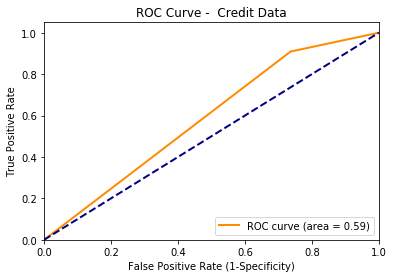

In [53]:
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.metrics import auc 
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_test, pos_label=1)
roc_auc = auc(fpr,tpr) 
plt.figure() 
lw = 2 
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate (1-Specificity)') 
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -  Credit Data') 
plt.legend(loc="lower right")
plt.show()

In [44]:
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x1[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
sex_male 1.047
house_own 1.042
purpose_radio/TV 1.044
Age 1.035
Saving accounts 1.02
Checking account 1.055
Duration 1.016


C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [45]:
model.intercept_

array([-0.7127267])

In [46]:
model.coef_

array([[ 0.32140164,  0.54322645,  0.49779632,  0.028266  ,  0.26808532,
         0.76248513, -0.03591676]])

In [47]:
 New_summary= credit_data_new.drop('Risk',axis=1)

In [48]:
New_summary.columns.values

array(['sex_male', 'house_own', 'purpose_radio/TV', 'Age',
       'Saving accounts', 'Checking account', 'Duration'], dtype=object)

In [49]:
feature_name=New_summary.columns.values

In [50]:
Summary_Table=pd.DataFrame(columns=['Feature Name'], data = feature_name)
Summary_Table['Coefficient']=np.transpose(model.coef_)
Summary_Table.index=Summary_Table.index + 1
Summary_Table.loc[0]=['Intercept', model.intercept_[0]]
Summary_Table=Summary_Table.sort_index()
Summary_Table['Odds Ratio']=np.exp(Summary_Table.Coefficient)
Summary_Table.sort_values('Odds Ratio',ascending=False)

,Feature Name,Coefficient,Odds Ratio
6,Checking account,0.762485,2.143597
2,house_own,0.543226,1.721552
3,purpose_radio/TV,0.497796,1.645092
1,sex_male,0.321402,1.379059
5,Saving accounts,0.268085,1.307459
4,Age,0.028266,1.028669
7,Duration,-0.035917,0.964721
0,Intercept,-0.712727,0.490305


In [51]:
print('Test Data Set')
print(classification_report(y_test,model.predict(x_test)))
print('-----------------------------------------------------------------')
print('Train Data Set')
print(classification_report(y_train,model.predict(x_train)))

Test Data Set
              precision    recall  f1-score   support

           0       0.56      0.26      0.36        91
           1       0.74      0.91      0.82       209

    accuracy                           0.71       300
   macro avg       0.65      0.59      0.59       300
weighted avg       0.68      0.71      0.68       300

-----------------------------------------------------------------
Train Data Set
              precision    recall  f1-score   support

           0       0.61      0.31      0.41       209
           1       0.76      0.92      0.83       491

    accuracy                           0.73       700
   macro avg       0.68      0.61      0.62       700
weighted avg       0.71      0.73      0.70       700



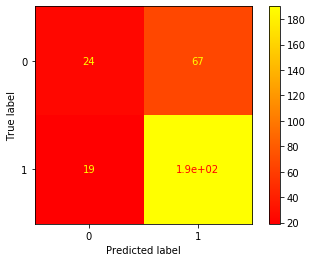

In [52]:
from sklearn.metrics import plot_confusion_matrix
class_names=np.unique(credit_data_new['Risk'])
class_names
plot_confusion_matrix(model,x_test,y_test,
                     display_labels=class_names,
                     cmap=plt.cm.autumn);